In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
twitter = pd.read_excel("D://Datasets//Twitter.xlsx")

In [4]:
twitter.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
twitter.tail()
        

,Tweet ID,Entity,Sentiment,Tweet Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [6]:
twitter.shape

(74682, 4)

In [7]:
print(twitter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [8]:
print(twitter.isnull().sum())

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64


In [9]:
df_twitter = twitter.dropna()
print(df_twitter.shape)

(73996, 4)


In [10]:
print(df_twitter.duplicated().sum())


2341


In [11]:
df_twitter = df_twitter.drop_duplicates()
print(df_twitter.shape)

(71655, 4)


In [14]:
for col in df_twitter.columns:
    print(f"{col}:{df_twitter[col].nunique()} unique values")

Tweet ID:12447 unique values
Entity:32 unique values
Sentiment:4 unique values
Tweet Content:69489 unique values


In [15]:
df_twitter.describe(include=['object'])

,Entity,Sentiment,Tweet Content
count,71655,71655,71655
unique,32,4,69489
top,TomClancysRainbowSix,Negative,
freq,2328,21698,172


In [18]:
# Count how many positive/negative tweets per ID
sentiment_counts = df_twitter.groupby(['Tweet ID', 'Sentiment']).size().unstack(fill_value=0)
print(sentiment_counts)



Sentiment  Irrelevant  Negative  Neutral  Positive
Tweet ID                                          
1                   0         5        0         0
2                   0         6        0         0
3                   0         0        6         0
4                   0         6        0         0
5                   6         0        0         0
...               ...       ...      ...       ...
13196               6         0        0         0
13197               0         0        6         0
13198               0         0        0         6
13199               6         0        0         0
13200               6         0        0         0

[12447 rows x 4 columns]


       Tweet ID  Number of tweets
0             1                 5
1             2                 6
2             3                 6
3             4                 6
4             5                 6
...         ...               ...
12442     13196                 6
12443     13197                 6
12444     13198                 6
12445     13199                 6
12446     13200                 6

[12447 rows x 2 columns]


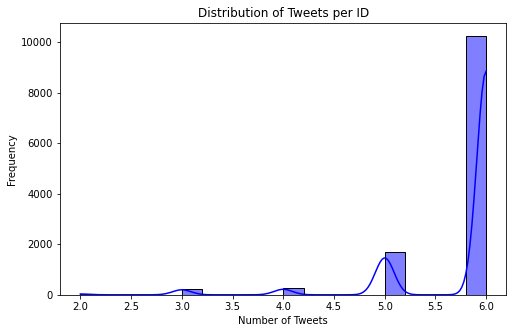

In [25]:
Tweets = df_twitter.groupby("Tweet ID")["Tweet Content"].nunique().reset_index()
#Number of Tweet per ID
Tweets.columns = ['Tweet ID', 'Number of tweets']
print(Tweets)


plt.figure(figsize=(8,5))
sns.histplot(Tweets['Number of tweets'], bins=20, kde=True, color="blue")
plt.title("Distribution of Tweets per ID")
plt.xlabel("Number of Tweets")
plt.ylabel("Frequency")
plt.show()


In [20]:
pd.crosstab(df_twitter['Entity'], df_twitter['Sentiment'])


Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,972
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


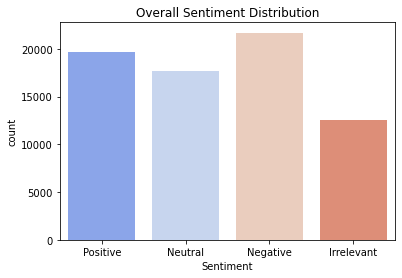

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df_twitter, palette="coolwarm")
plt.title("Overall Sentiment Distribution")
plt.show()


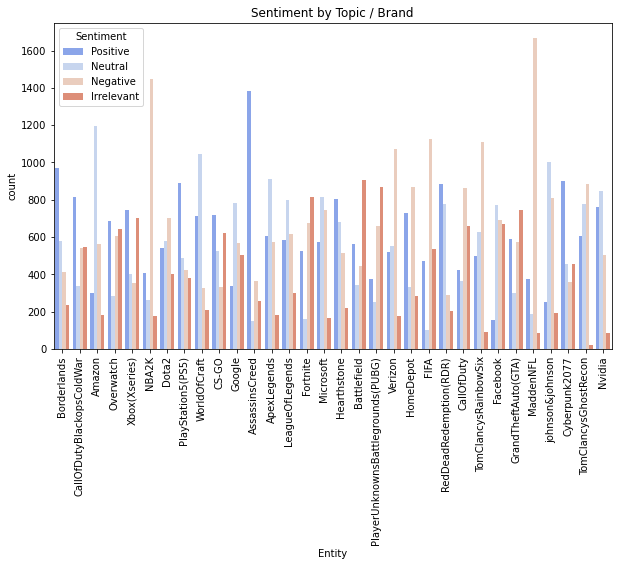

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Entity', hue='Sentiment', data=df_twitter, palette="coolwarm")
plt.title("Sentiment by Topic / Brand")
plt.xticks(rotation=90)
plt.show()


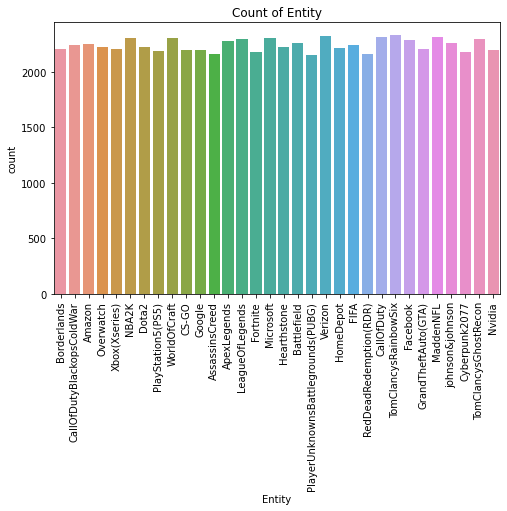

In [23]:
#countplot for sub-category

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_twitter, x='Entity')

# Add labels
#for container in ax.containers:
    #ax.bar_label(container)

plt.title("Count of Entity")
plt.xticks(rotation=90)
plt.show()